<a href="https://colab.research.google.com/github/MorojMunshi/Lab/blob/main/Yet_another_copy_of_CIFAR10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [ ]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

**CNN MODEL**

In [ ]:
# Create a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 90ms/step - accuracy: 0.3279 - loss: 1.8171 - val_accuracy: 0.4928 - val_loss: 1.4020
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.5456 - loss: 1.2746 - val_accuracy: 0.5476 - val_loss: 1.2755
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.6125 - loss: 1.1059 - val_accuracy: 0.6373 - val_loss: 1.0500
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 90ms/step - accuracy: 0.6554 - loss: 0.9854 - val_accuracy: 0.6672 - val_loss: 0.9616
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.6868 - loss: 0.8953 - val_accuracy: 0.6662 - val_loss: 0.9637
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 90ms/step - accuracy: 0.7019 - loss: 0.8550 - val_accuracy: 0.6919 - val_loss: 0.8966
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.7233 - loss: 0.7852 - val_accuracy: 0.6893 - val_loss: 0.9025
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 86ms/step - accuracy: 0.7398 - loss: 0.7388 - 

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

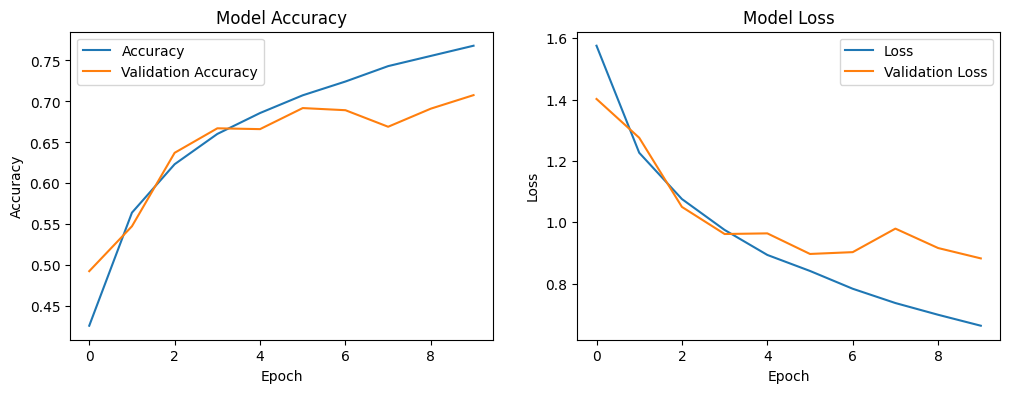

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

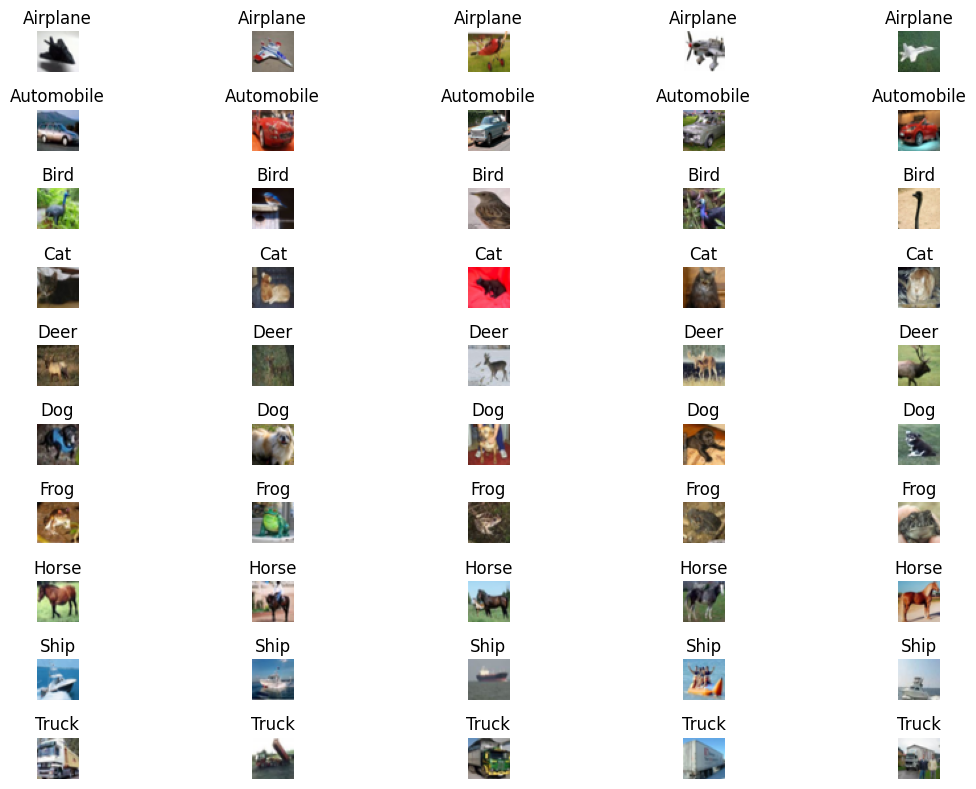

In [ ]:
# Visualize a few images from each class
import numpy as np

def plot_classes(x_train, y_train, class_names):
    plt.figure(figsize=(12, 8))

    for i in range(len(class_names)):
        # Get indices for images of the current class
        indices = np.where(y_train == i)[0][:5]  # Take 5 images for each class
        for j, idx in enumerate(indices):
            plt.subplot(len(class_names), 5, i * 5 + j + 1)  # Arrange images in a grid
            plt.imshow(x_train[idx])
            plt.axis('off')  # Turn off axis
            plt.title(class_names[i])  # Set title to the class name

    plt.tight_layout()
    plt.show()

# Call the function to plot classes
plot_classes(x_train, y_train, class_names)


In [ ]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train_rnn, y_train_rnn), (x_test_rnn, y_test_rnn) = cifar10.load_data()


In [ ]:
# Normalize the pixel values to be between 0 and 1
x_train_rnn = x_train_rnn.astype('float32') / 255.0
x_test_rnn = x_test_rnn.astype('float32') / 255.0

# Reshape the data to fit the RNN input shape
# Shape: (num_samples, timesteps, features)
# Here, we consider each row of pixels (32 rows) as a timestep and each pixel as a feature (3 features for RGB)
x_train_rnn_reshaped = x_train_rnn.reshape(x_train_rnn.shape[0], x_train_rnn.shape[1], -1)  # (num_samples, 32, 96)
x_test_rnn_reshaped = x_test_rnn.reshape(x_test_rnn.shape[0], x_test_rnn.shape[1], -1)      # (num_samples, 32, 96)

**RNN MODEL**

In [ ]:
# Create an RNN model
rnn_model = models.Sequential([
    layers.SimpleRNN(64, input_shape=(32, 96), return_sequences=True),
    layers.SimpleRNN(64),
    layers.Dense(10, activation='softmax')
])

# Compile the model
rnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
rnn_history = rnn_model.fit(x_train_rnn_reshaped, y_train_rnn, epochs=10, batch_size=64, validation_data=(x_test_rnn_reshaped, y_test_rnn))

# Evaluate the model
test_loss_rnn, test_acc_rnn = rnn_model.evaluate(x_test_rnn_reshaped, y_test_rnn, verbose=2)
print(f'\nTest accuracy (RNN): {test_acc_rnn}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.2344 - loss: 2.0757 - val_accuracy: 0.3179 - val_loss: 1.8747
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.3227 - loss: 1.8453 - val_accuracy: 0.3485 - val_loss: 1.7947
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.3417 - loss: 1.7957 - val_accuracy: 0.2993 - val_loss: 1.8786
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.3054 - loss: 1.8827 - val_accuracy: 0.2850 - val_loss: 1.9221
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.3034 - loss: 1.8985 - val_accuracy: 0.3321 - val_loss: 1.8178
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.3271 - loss: 1.8320 - val_accuracy: 0.3324 - val_loss: 1.8483
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.3421 - loss: 1.7967 - val_accuracy: 0.3605 - val_loss: 1.7478
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.3525 - loss: 1.7687 - 

In [ ]:
rnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32, 64)              │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,632 (225.13 KB)

 Trainable params: 19,210 (75.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,422 (150.09 KB)

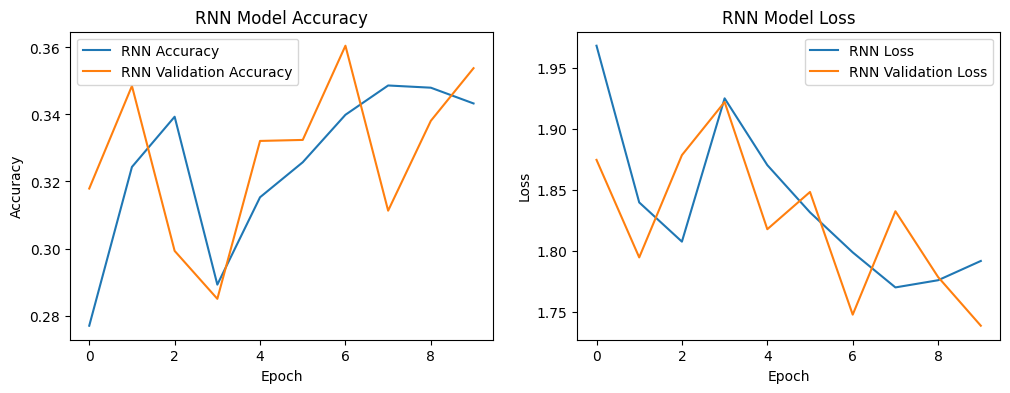

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'], label='RNN Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'], label='RNN Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

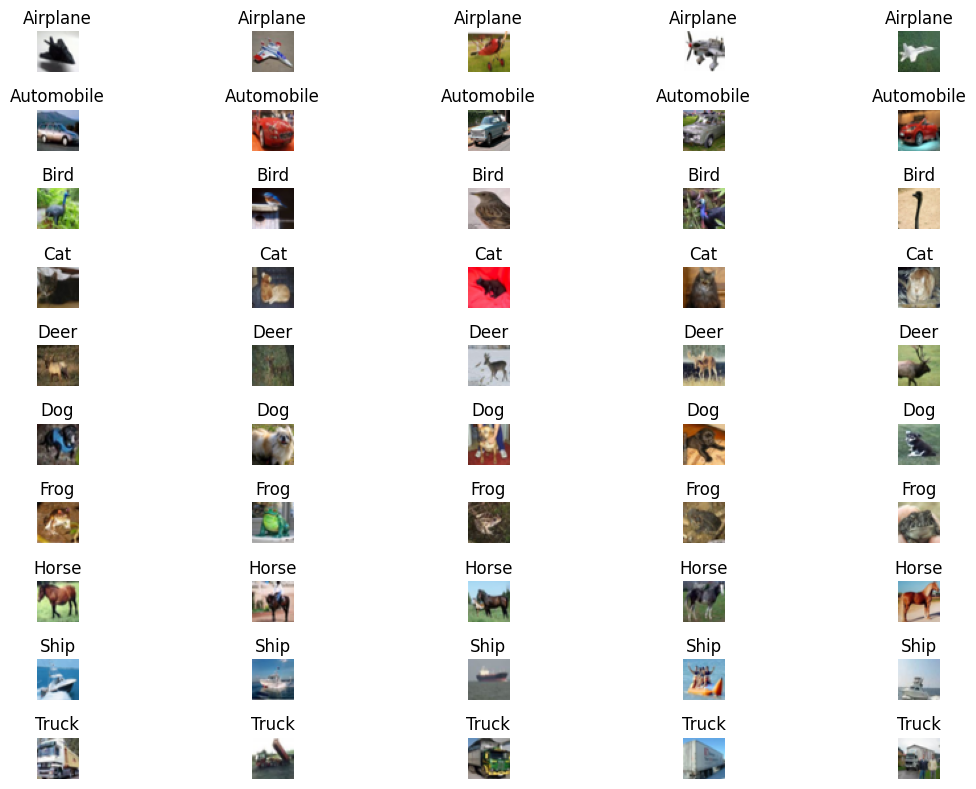

In [ ]:
# Visualize a few images from each class
import numpy as np

def plot_classes(x_train, y_train, class_names):
    plt.figure(figsize=(12, 8))

    for i in range(len(class_names)):
        # Get indices for images of the current class
        indices = np.where(y_train == i)[0][:5]  # Take 5 images for each class
        for j, idx in enumerate(indices):
            plt.subplot(len(class_names), 5, i * 5 + j + 1)  # Arrange images in a grid
            plt.imshow(x_train[idx])
            plt.axis('off')  # Turn off axis
            plt.title(class_names[i])  # Set title to the class name

    plt.tight_layout()
    plt.show()

# Call the function to plot classes
plot_classes(x_train_rnn, y_train_rnn, class_names)

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# تحميل بيانات CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# تحويل الصور إلى شكل مسطح (لأن Decision Tree لا يتعامل مع البيانات ثلاثية الأبعاد)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# تهيئة وتصنيف نموذج Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_flat, y_train.ravel())

# توقع وتحليل النتائج
y_pred = dt_model.predict(x_test_flat)
accuracy = accuracy_score(y_test, y_pred)

print("Decision Tree Test Accuracy:", accuracy)

Decision Tree Test Accuracy: 0.2663


In [ ]:
pip install torch torchvision torchattacks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.3.0
    Uninstalling urllib3-2.3.0:
      Successfully uninstalled urllib3-2.3.0
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
  Attempting uninstall: requests
    Found existing installation: req

In [ ]:
# استيراد المكتبات اللازمة
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchattacks

# الخطوة 1: معالجة البيانات
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # تطبيع صور MNIST
])

# تحميل بيانات MNIST
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# الخطوة 2: تدريب النموذج
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# تهيئة النموذج، ودالة الخسارة، والمُحسّن
net = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# تدريب النموذج
print("جاري تدريب النموذج...")
for epoch in range(2):  # عدد العصور
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if i % 100 == 99:  # طباعة كل 100 دفعة
            print(f"العصر {epoch + 1}, الدفعة {i + 1}: الخسارة = {running_loss / 100:.4f}")
            running_loss = 0.0

print("تم تدريب النموذج بنجاح.")

# الخطوة 3: إنشاء العينات العدائية
print("جاري إنشاء العينات العدائية...")
fgsm = torchattacks.FGSM(net, eps=0.3)  # هجوم FGSM

adversarial_data = []
for inputs, labels in testloader:
    adv_inputs = fgsm(inputs, labels)
    adversarial_data.append((adv_inputs, labels))

print("تم إنشاء العينات العدائية.")

# الخطوة 4: تقييم النموذج على العينات العدائية
print("جاري تقييم النموذج على العينات العدائية...")
correct = 0
total = 0

with torch.no_grad():
    for adv_inputs, labels in adversarial_data:
        outputs = net(adv_inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"الدقة على العينات العدائية: {accuracy:.2f}%")

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 41.3MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.23MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.9MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.85MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

جاري تدريب النموذج...
العصر 1, الدفعة 100: الخسارة = 0.6300
العصر 1, الدفعة 200: الخسارة = 0.1753
العصر 1, الدفعة 300: الخسارة = 0.1283
العصر 1, الدفعة 400: الخسارة = 0.0909
العصر 1, الدفعة 500: الخسارة = 0.0824
العصر 1, الدفعة 600: الخسارة = 0.0746
العصر 1, الدفعة 700: الخسارة = 0.0656
العصر 1, الدفعة 800: الخسارة = 0.0621
العصر 1, الدفعة 900: الخسارة = 0.0592
العصر 2, الدفعة 100: الخسارة = 0.0499
العصر 2, الدفعة 200: الخسارة = 0.0557
العصر 2, الدفعة 300: الخسارة = 0.0524
العصر 2, الدفعة 400: الخسارة = 0.0499
العصر 2, الدفعة 500: الخسارة = 0.0468
العصر 2, الدفعة 600: الخسارة = 0.0345
العصر 2, الدفعة 700: الخسارة = 0.0492
العصر 2, الدفعة 800: الخسارة = 0.0394
العصر 2, الدفعة 900: الخسارة = 0.0433
تم تدريب النموذج بنجاح.
جاري إنشاء العينات العدائية...
تم إنشاء العينات العدائية.
جاري تقييم النموذج على العينات العدائية...
الدقة على العينات العدائية: 67.46%


In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchattacks

# Step 1: Data Preprocessing
def data_preprocessing():
    print("Step 1: Data Preprocessing...")
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))  # Normalize MNIST images
    ])
    trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
    testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
    print("Data preprocessing completed.")
    return trainloader, testloader

# Step 2: Model Training
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train_model(trainloader):
    print("Step 2: Model Training...")
    net = SimpleCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    for epoch in range(2):  # Train for 2 epochs
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader):
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 100 == 99:
                print(f"Epoch {epoch + 1}, Batch {i + 1}: Loss = {running_loss / 100:.4f}")
                running_loss = 0.0

    print("Model training completed.")
    return net

# Step 3: Crafting Adversarial Examples
def craft_adversarial_examples(net, testloader):
    print("Step 3: Crafting Adversarial Examples...")
    fgsm = torchattacks.FGSM(net, eps=0.3)  # Fast Gradient Sign Method
    adversarial_data = []
    for inputs, labels in testloader:
        adv_inputs = fgsm(inputs, labels)
        adversarial_data.append((adv_inputs, labels))
    print("Adversarial examples created.")
    return adversarial_data

# Step 4: Evaluating the Model on Adversarial Inputs
def evaluate_model(net, adversarial_data):
    print("Step 4: Evaluating the Model on Adversarial Inputs...")
    correct = 0
    total = 0
    with torch.no_grad():
        for adv_inputs, labels in adversarial_data:
            outputs = net(adv_inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy on adversarial examples: {accuracy:.2f}%")

# Main execution
if __name__ == "__main__":
    trainloader, testloader = data_preprocessing()
    model = train_model(trainloader)
    adversarial_examples = craft_adversarial_examples(model, testloader)
    evaluate_model(model, adversarial_examples)

Step 1: Data Preprocessing...
Data preprocessing completed.
Step 2: Model Training...
Epoch 1, Batch 100: Loss = 0.6478
Epoch 1, Batch 200: Loss = 0.1897
Epoch 1, Batch 300: Loss = 0.1186
Epoch 1, Batch 400: Loss = 0.1048
Epoch 1, Batch 500: Loss = 0.0829
Epoch 1, Batch 600: Loss = 0.0812
Epoch 1, Batch 700: Loss = 0.0735
Epoch 1, Batch 800: Loss = 0.0577
Epoch 1, Batch 900: Loss = 0.0637
Epoch 2, Batch 100: Loss = 0.0407
Epoch 2, Batch 200: Loss = 0.0453
Epoch 2, Batch 300: Loss = 0.0507
Epoch 2, Batch 400: Loss = 0.0431
Epoch 2, Batch 500: Loss = 0.0537
Epoch 2, Batch 600: Loss = 0.0439
Epoch 2, Batch 700: Loss = 0.0417
Epoch 2, Batch 800: Loss = 0.0474
Epoch 2, Batch 900: Loss = 0.0456
Model training completed.
Step 3: Crafting Adversarial Examples...
Adversarial examples created.
Step 4: Evaluating the Model on Adversarial Inputs...
Accuracy on adversarial examples: 72.81%


1. Step 1: Data Preprocessing


	•	Objective: Load and preprocess the MNIST dataset.
	•	What happens: The code downloads the MNIST dataset (which contains handwritten digit images) from the internet, converts the images to tensor format using ToTensor(), and normalizes the pixel values to a range between -1 and 1 using Normalize((0.5,), (0.5,)).
	•	The dataset is split into two parts:
	•	trainloader: The training dataset.
	•	testloader: The testing dataset.


2. Step 2: Model Training



	•	Objective: Build and train a simple CNN model

	•	What happens: A simple CNN model is created with:
	•	Two convolutional layers.
	•	Two max-pooling layers.
	•	Two fully connected layers.
	•	The model is trained using CrossEntropyLoss and the Adam optimizer to adjust the model’s weights. The loss is printed every 100 batches during training.


3. Step 3: Crafting Adversarial Examples


	•	Objective: Test the model’s vulnerability using an adversarial attack (FGSM).
	•	What happens: The code uses the Fast Gradient Sign Method (FGSM) to generate adversarial examples that are slightly modified versions of the original images, aiming to confuse the model into making incorrect predictions. These adversarial examples are created using the torchattacks library.

4. Step 4: Evaluating the Model on Adversarial Inputs


	•	Objective: Evaluate the model’s performance when tested with adversarial examples.
	•	What happens: The model is tested on the adversarial examples created in the previous step. The accuracy is calculated by comparing the predicted labels with the true labels, and the percentage of correct predictions is printed.


Main Benefits of this Code:


	•	Deep Learning: The code demonstrates how to build a robust model for classifying digits using deep neural networks (CNNs).
	•	Adversarial Attacks: It shows how adversarial attacks can be used to exploit weaknesses in models.
	•	Model Robustness: This code can be used to test the model’s resilience to adversarial attacks and evaluate whether it is robust enough to handle such inputs.


```
# Step 3: Crafting Adversarial Examples
def craft_adversarial_examples(net, testloader):
    print("Step 3: Crafting Adversarial Examples...")
    # FGSM attack creation
    fgsm = torchattacks.FGSM(net, eps=0.3)  # 0.3 is the perturbation level
    adversarial_data = []
    for inputs, labels in testloader:
        # Generate adversarial examples
        adv_inputs = fgsm(inputs, labels)
        adversarial_data.append((adv_inputs, labels))
    print("Adversarial examples created.")
    return adversarial_data
```

          #**الكود الذي ينفذ الهجوم**